# Neural Style Transfer using Tensorflow Style Hub

Combine skin care products of Dior with Tarsila do Amaral Postacard paiting.


dior_20.png


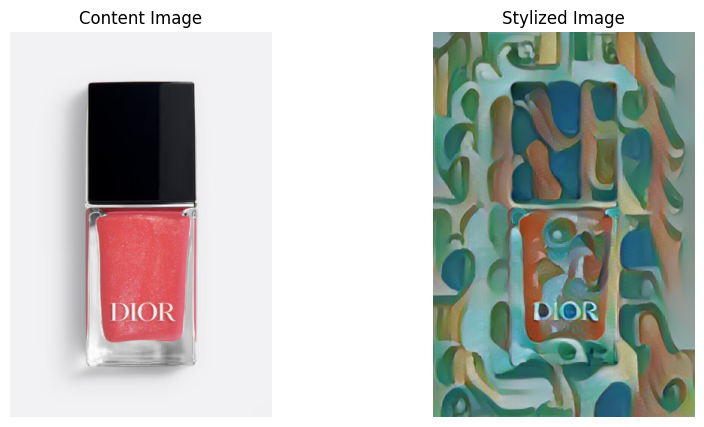

dior_18.png


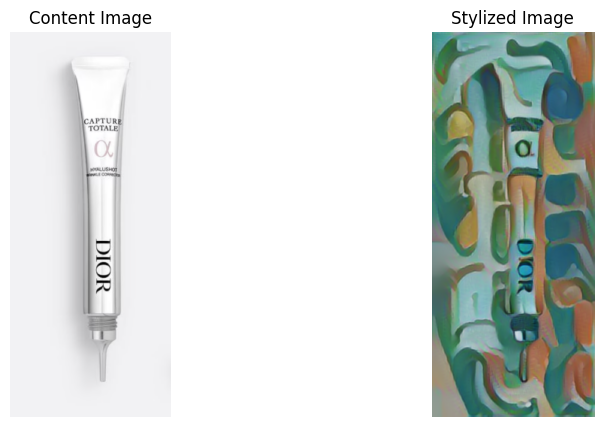

dior_19.png


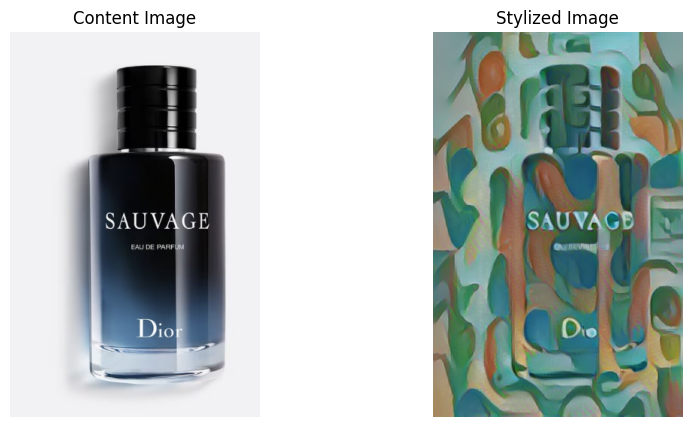

dior_9.png


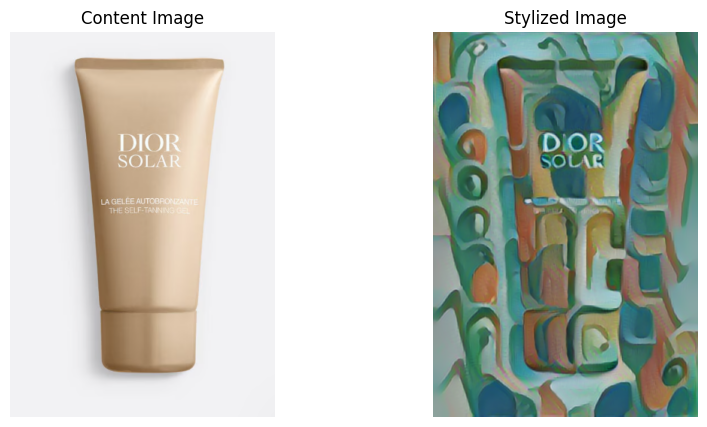

dior_8.png


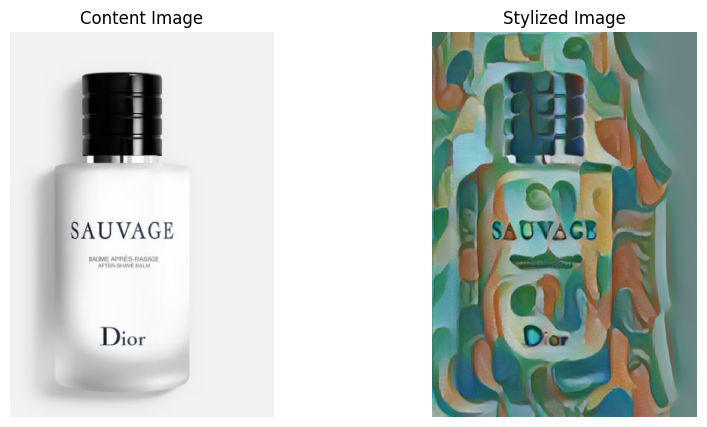

dior_1.png


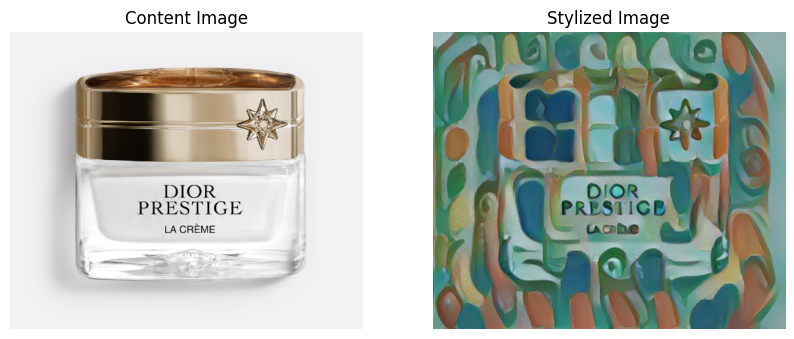

dior_3.png


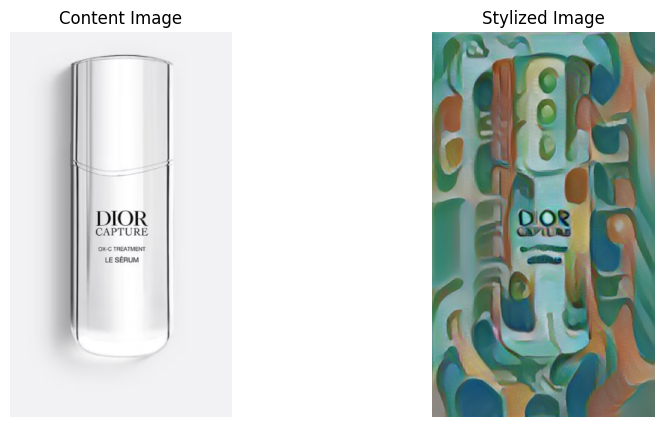

dior_2.png


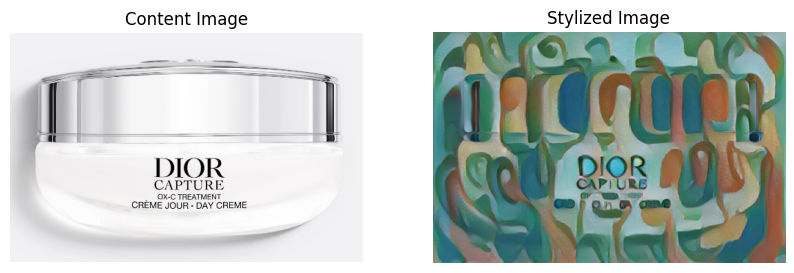

dior_6.png


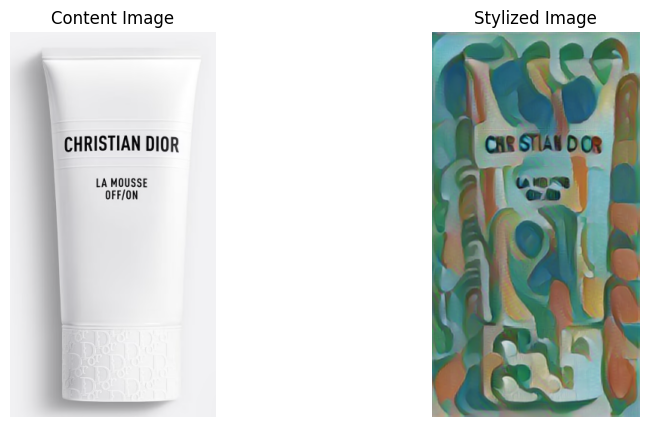

dior_7.png


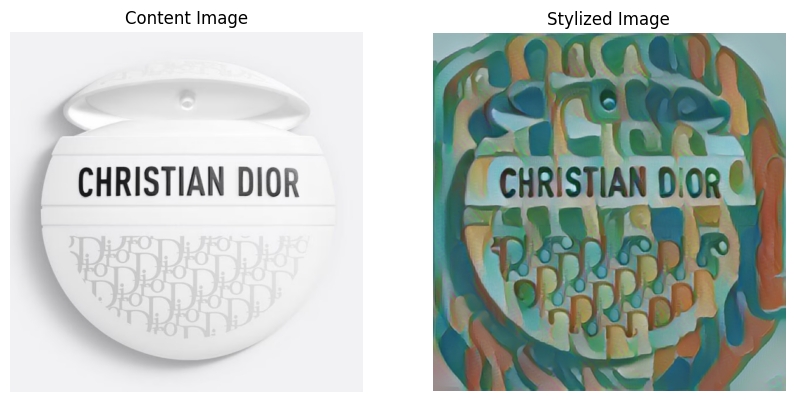

dior_5.png


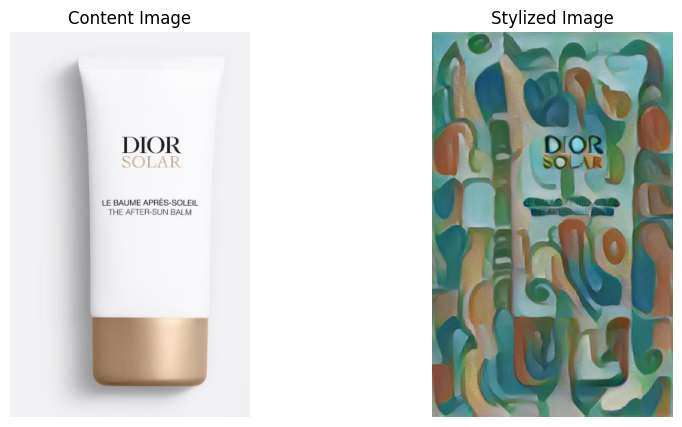

dior_4.png


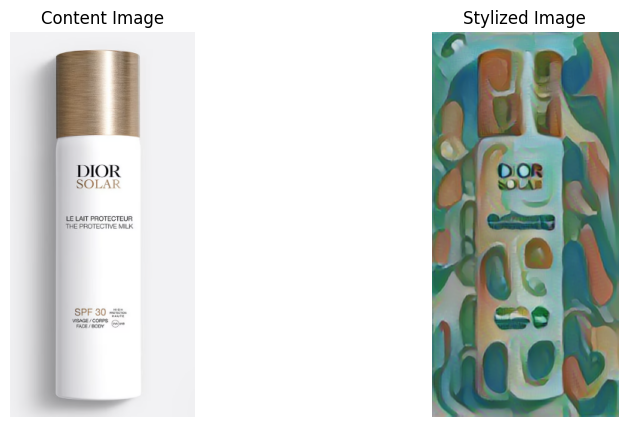

dior_17.png


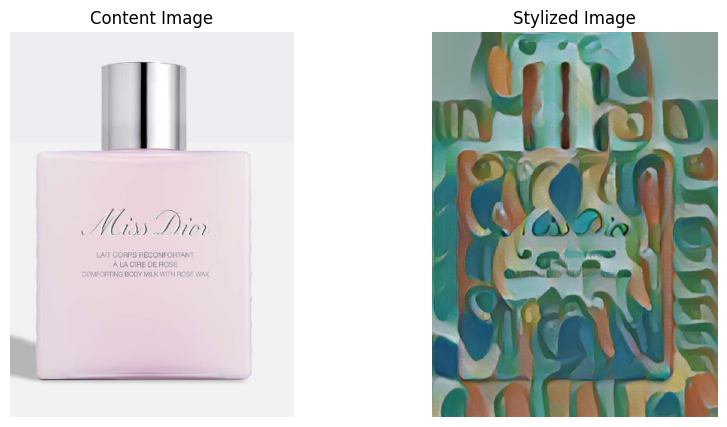

dior_16.png


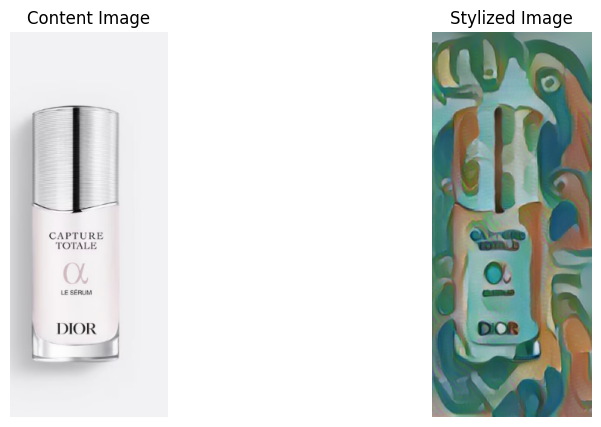

dior_14.png


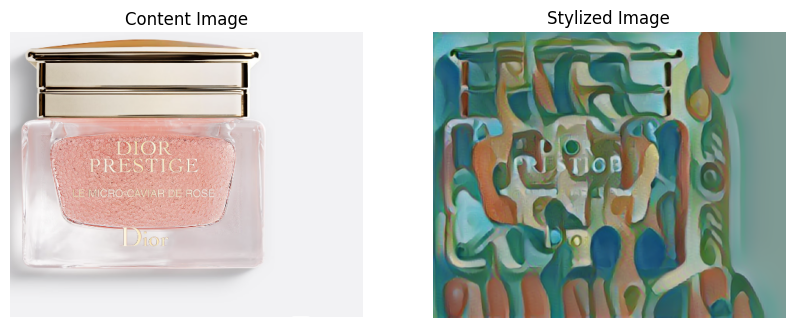

dior_15.png


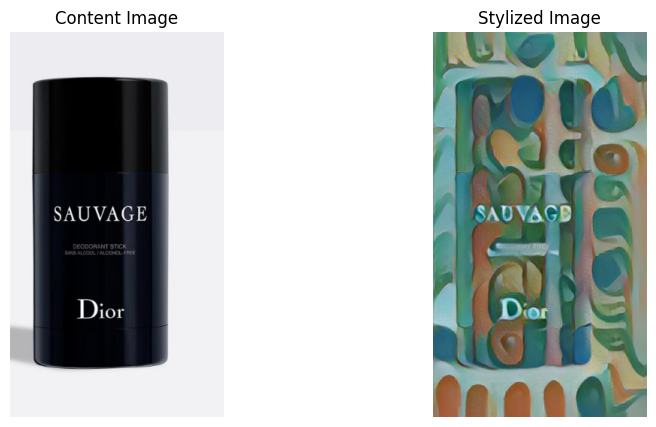

dior_11.png


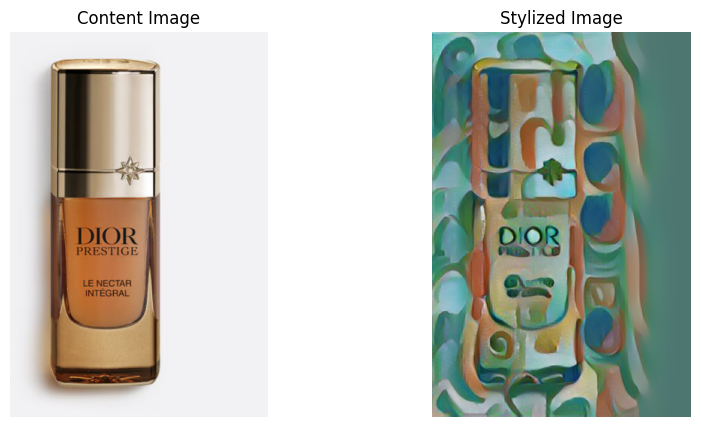

dior_10.png


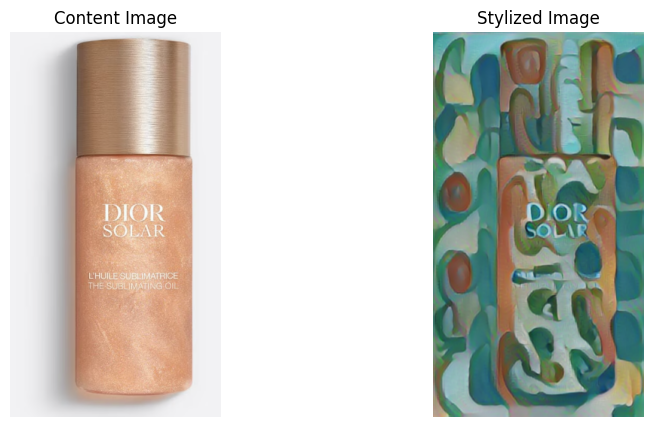

dior_12.png


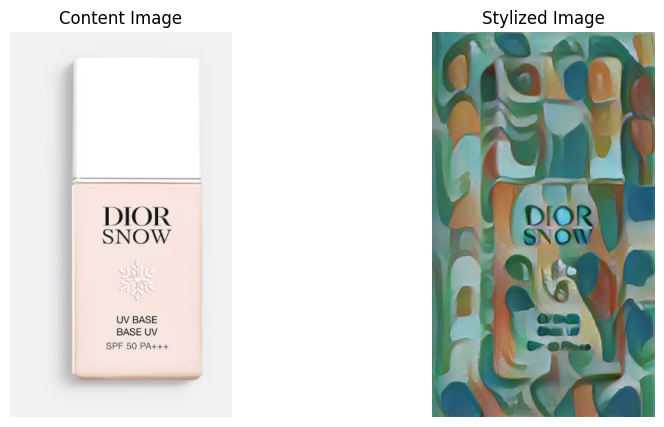

dior_13.png


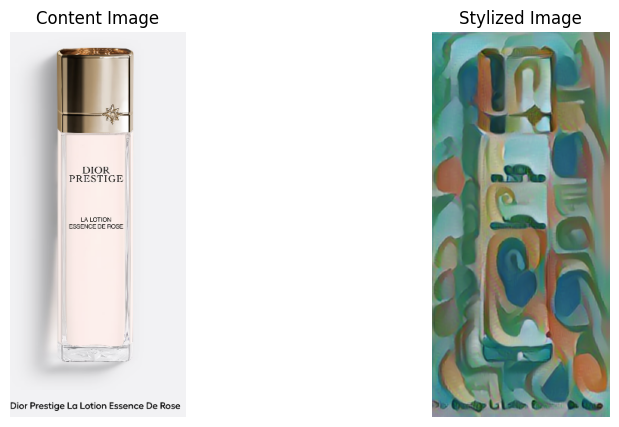

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

import tensorflow as tf

def load_img(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Ensure floating point type for scaling

    max_dim = 512
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)  # Use float32 for calculations
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)  # Cast new_shape to int32 for tf.image.resize
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return tensor

def save_image(image, save_path):
    # Convert the numpy array image to a PIL Image and save it
    pil_image = Image.fromarray(image)
    
    pil_image.save(save_path)


# Paths
path_content = './images/content/'
path_results = './images/img_results/'

style_image = load_img("./images/tarsila.png")
files = os.listdir(path_content)


for file in files:

    if file.endswith(".png") or file.endswith(".jpg"):
        print(file)
        content_image = load_img(path_content+file)
        
        hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
        stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    
        # Convert tensor to image and display it
        stylized_image = tensor_to_image(stylized_image)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(tensor_to_image(content_image))
        plt.title('Content Image')
        plt.axis('off')
    
        plt.subplot(1, 2, 2)
        plt.imshow(stylized_image)
        plt.title('Stylized Image')
        plt.axis('off')
        plt.show()


        # Save styled images to folder
        save_path = path_results + "styled_" + file
        save_image(stylized_image, save_path)